In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

### Load Data

In [2]:
train_data = pd.read_csv("./mnist-original/mnist_train.csv")
test_data = pd.read_csv("./mnist-original/mnist_test.csv")

In [3]:
x_train, y_train = train_data.drop(["5"], axis=1).values/255, train_data["5"].values
x_test, y_test = test_data.drop(["7"], axis=1).values/255, test_data["7"].values

In [4]:
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))
encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train.reshape((-1, 1)))

/home/deepdroid/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


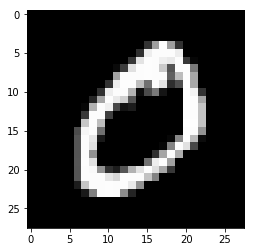

In [5]:
plt.imshow(x_train[0][..., 0], cmap="gray")
plt.show()

### Model - LeNet 1

![](https://miro.medium.com/max/700/1*ge5OLutAT9_3fxt_sKTBGA.png)

28×28 input image > <br>
Four 24×24 feature maps convolutional layer (5×5 size) > <br>
Average Pooling layers (2×2 size) > <br>
Eight 12×12 feature maps convolutional layer (5×5 size) ><br>
Average Pooling layers (2×2 size) ><br>
Directly fully connected to the output

In [6]:
from keras.layers import Dense, Conv2D, AveragePooling2D, Flatten
from keras.models import Sequential

Using TensorFlow backend.


In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(filters = 4, kernel_size = (5,5), activation="relu", input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 8, kernel_size = (8, 8), activation="relu"))
model.add(AveragePooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units=10, activation="softmax"))

In [9]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 4)         104       
_________________________________________________________________
average_pooling2d_1 (Average (None, 12, 12, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 8)           2056      
_________________________________________________________________
average_pooling2d_2 (Average (None, 2, 2, 8)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 2,490
Trainable params: 2,490
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.fit(x_train, y_train, epochs=1, batch_size=1)

Epoch 1/1
59999/59999 [==============================] - 158s 3ms/step - loss: 0.0927 - acc: 0.9723


In [58]:
y_pred = model.predict(x_test)

In [59]:
np.mean(np.argmax(y_pred, axis=1) == y_test)

0.9702970297029703

###  Whiteboard numbers

In [42]:
import cv2

In [63]:
image = cv2.imread("../images/image-{2}.png")[..., [2,1,0]]

In [64]:
image = cv2.cvtColor(cv2.resize(image, (28, 28)), cv2.COLOR_RGB2GRAY)

In [65]:
image = np.pad(image, (10, 10), 'constant', constant_values=0)

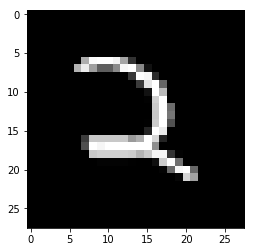

In [66]:
image = cv2.resize(image, (28, 28))
plt.imshow(image, cmap="gray")
plt.show()

In [67]:
np.argmax(model.predict(image.reshape(1,28,28,1)))

2

In [68]:
import os

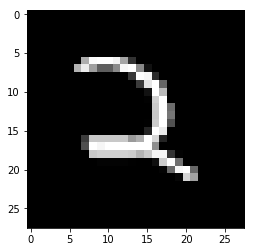

2


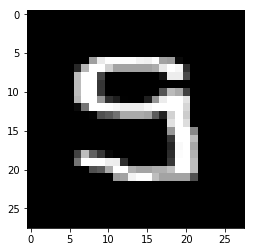

9


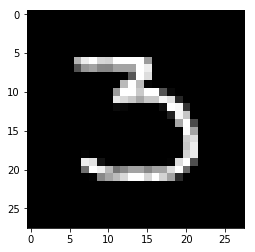

3


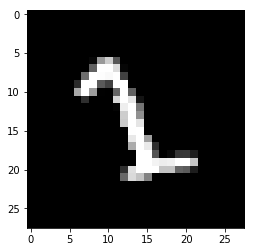

1


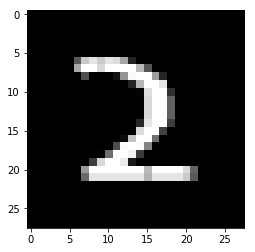

2


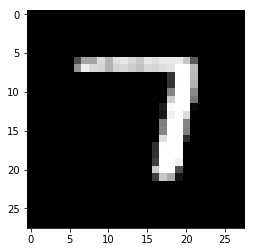

7


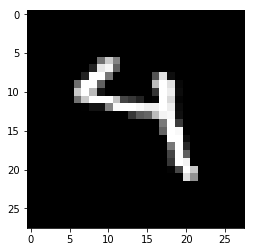

4


In [69]:
for filename in os.listdir("../images"):
    image = cv2.imread("../images/" + filename)[..., [2,1,0]]
    image = cv2.cvtColor(cv2.resize(image, (28, 28)), cv2.COLOR_RGB2GRAY)
    image = np.pad(image, (10, 10), 'constant', constant_values=0)
    image = cv2.resize(image, (28, 28))
    plt.imshow(image, cmap="gray")
    plt.show()
    print(np.argmax(model.predict(image.reshape(1,28,28,1))))

In [70]:
model.save("./mnist_lenet-1-improved.h5")